# Getting Started with the Curvytron OpenAI environment

# Installation

Follow the instructions [here](https://hackmd.io/8VOQUHNgTAugEBBwtZ91Sg#Setup)

# Setup

Go and sit in the root directory!

In [1]:
%cd ..

/home/james/git/forks/curvytron-client


In [2]:
import threading
import curvytron
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import numpy as np

Start a curvytron server and point to its address. You have two options here:
1. Use a server already set up e.g. curvytron.com (N.B. Permission to use this server was kindly granted by Curvytron developer [@Tom32i](https://twitter.com/Tom32i). **Please do not abuse the server by spamming it with requests!**)
1. Setup and start your own server. The code is here: https://github.com/Curvytron/curvytron

If you're inside the Edinburgh University network, I normally have an instance running at the Informatics Forum at the address below (you need to be on the network to see it - you may need to [VPN in](http://computing.help.inf.ed.ac.uk/openvpn))

In [3]:
serveraddress = "129.215.91.49:8080"

# Example Use

This instantiates a curvytron environment. A player called `name` will join a room called `room` on the specified server.

In [4]:
env = curvytron.CurvytronEnv(server=serveraddress, 
                             room='1337_test_room', 
                             name='pink_boi', 
                             color='#ff0090')

The below runs a random policy and plots the state at each timepoint. Since the player moves randomly, you may need to run this a few times to see trails, though you should always see a dot moving around before the player hits the edge.

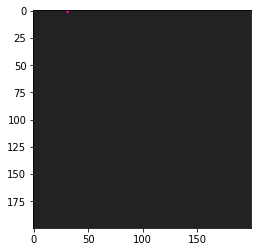

Episode finished after 22 steps
Killing player (Returns None)


In [5]:
env.reset()
episode_over = False
steps = 0
while not episode_over:
    steps += 1
    action = np.random.choice(3)
    ob, r, episode_over = env.step(action)
    plt.clf()
    ax = plt.imshow(ob.pixels)
    display(plt.gcf())
    clear_output(wait=True)
    print('Angle={}, Position={}'.format(ob.angle, ob.position), end='\r')
    plt.pause(0.01)
print("Episode finished after {} steps".format(steps))
print("Killing player (Returns {})".format(env.client.join()))

# The State Space

The valid actions are simply 0, 1, and 2, which are left, straight, and right respectively. The server will continue running the previously submitted action until a different action is given.

Let's observe the state that is returned when we call env.step(action), in the code above we saved it in `ob`.

In [6]:
ob

In [7]:
vars(ob).keys()

dict_keys(['angle', 'position', 'pixels'])

In [8]:
for kk in vars(ob):
    print('Attribute: curvytron.State.{}\n{}'.format(kk, 10*'='))
    display(type(vars(ob)[kk]))
    display(vars(ob)[kk])
    print('\n')
print(ob.pixels.shape)

Attribute: curvytron.State.angle


float

5.05



Attribute: curvytron.State.position


tuple

(1.0, 31.375)



Attribute: curvytron.State.pixels


numpy.ndarray

array([[[34, 34, 34],
        [34, 34, 34],
        [34, 34, 34],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [34, 34, 34]],

       [[34, 34, 34],
        [34, 34, 34],
        [34, 34, 34],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [34, 34, 34]],

       [[34, 34, 34],
        [34, 34, 34],
        [34, 34, 34],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [34, 34, 34]],

       ...,

       [[34, 34, 34],
        [34, 34, 34],
        [34, 34, 34],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [34, 34, 34]],

       [[34, 34, 34],
        [34, 34, 34],
        [34, 34, 34],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [34, 34, 34]],

       [[34, 34, 34],
        [34, 34, 34],
        [34, 34, 34],
        ...,
        [34, 34, 34],
        [34, 34, 34],
        [34, 34, 34]]], dtype=uint8)



(200, 200, 3)


# Starter Heuristic Agents

You'll find some code to get you started creating some agents by hand here: https://github.com/RyanrDavies/curvytron-client/blob/master/heuristic_agent.py.

All you need to extend the `Agent` class (found in `agent.py`) and implement the `action()` method, telling the agent how to behave with respect to the state it is passed in its `run()` method as the game plays. The code below imports some bots and executes each on a thread.

Calling `agent.start()` on an instantiated class (inherited from Agent) will make the agent join its room, indicate that it's ready, and send actions to the server when it is in the game.

**You can join their game and play against them!**

In [9]:
from heuristic_agent import RandomAgent, HeuristicAgent1, HeuristicAgent2, RaymanAgent

In [10]:
agents = [RandomAgent(server=serveraddress, room='multiplayer', name='RandomAgent_{}'.format(ii)) 
                for ii in range(2)]
agents += [HeuristicAgent1(server=serveraddress, room='multiplayer', name='HeuristicAgent1_{}'.format(ii)) 
                for ii in range(2)]
agents += [HeuristicAgent2(server=serveraddress, room='multiplayer', name='HeuristicAgent2_{}'.format(ii)) 
                for ii in range(2)]
agents += [RaymanAgent(server=serveraddress, room='multiplayer', name='RaymanAgent_{}'.format(ii)) 
                for ii in range(2)]

Go join the game yourself! **Tip**: If you just want to watch (and not play), join the room and click the x next to your player name.

In [11]:
threads = []
for agent in agents:
    t = threading.Thread(target=agent.start())
    threads.append(t)
    t.start()

Exception in thread Thread-7:
Traceback (most recent call last):
  File "/home/james/anaconda2/envs/rlhack2/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/james/git/forks/curvytron-client/agent.py", line 25, in run
    state, reward, episode_over = self.env.step(action)
  File "/home/james/git/forks/curvytron-client/curvytron.py", line 47, in step
    state = State(self.client.get_canvas(), self.client.position, self.client.angle)
  File "/home/james/git/forks/curvytron-client/client.py", line 166, in get_canvas
    for player in self.game.players.keys():
RuntimeError: dictionary changed size during iteration

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/james/anaconda2/envs/rlhack2/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/james/git/forks/curvytron-client/agent.py", line 25, in run
    state, reward, episode_over = self.env.step(action)
  File "/home/james/git/forks

In [12]:
for agent in agents:
    agent.env.client.join()  # kills the agent

close status: 23387


An example of gameplay:
<!-- ![Heuristic Agents](https://i.imgur.com/YM0m0zw.gif) -->
<img src="https://i.imgur.com/YM0m0zw.gif" >

## What now?

Go fill out the [template](), import it, and play against some of our basic agents (or yourself!).

In [ ]:
from template_agents import MyNewAgent 

In [ ]:
agents = [MyNewAgent(server=serveraddress, room='multiplayer', name='MyNewAgent_{}'.format(ii)) 
                for ii in range(2)]
agents += [HeuristicAgent1(server=serveraddress, room='multiplayer', name='HeuristicAgent1_{}'.format(ii)) 
                for ii in range(2)]
agents += [HeuristicAgent2(server=serveraddress, room='multiplayer', name='HeuristicAgent2_{}'.format(ii)) 
                for ii in range(2)]
agents += [RaymanAgent(server=serveraddress, room='multiplayer', name='RaymanAgent_{}'.format(ii)) 
                for ii in range(2)]